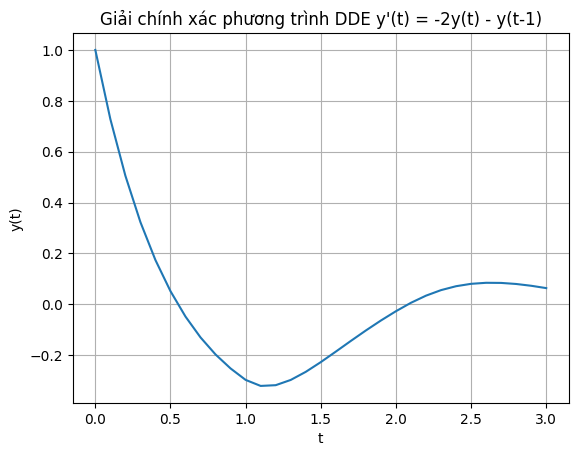

y(0) = 1.000000000000
y(1) = -0.296997075145
y(2) = -0.027030928949
y(3) = 0.063788138501
y(4) = -0.021432164247
y(5) = -0.002669839132
y(6) = 0.004921558602
y(7) = -0.001526607437
y(8) = -0.000258113465
y(9) = 0.000377914527
y(10) = -0.000107727659
Max error: 5.160802341031001e-16
Mean error: 1.1009898190272155e-16


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def y_exact(t):
    """
    Exact solution via method-of-steps closed-form:
    y(t) = 1 - 3 * sum_{k=0}^{floor(t)} (-1)^k / 2^{k+1} * [1 - e^{-2*(t-k)} * sum_{m=0}^k (2*(t-k))^m / m!]
    with y(t)=1 for t <= 0.
    """
    if t <= 0:
        return 1.0
    n = int(math.floor(t))
    s = 0.0
    for k in range(n + 1):
        u = t - k
        # inner sum for m=0..k of (2u)^m / m!
        sum_m = sum((2*u)**m / math.factorial(m) for m in range(k + 1))
        term = ((1 - math.exp(-2*u) * sum_m) / (2**(k + 1))) * ((-1)**k)
        s += term
    return 1 - 3 * s

# Compute on [0, 10] with 1001 points
t_vals = np.linspace(0, 10, 1001)
y_vals = [y_exact(t) for t in t_vals]

# Plot y(t)
plt.figure()
plt.plot(t_vals, y_vals)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Giải chính xác phương trình DDE y\'(t) = -2y(t) - y(t-1)')
plt.grid(True)
plt.show()

# Print integer values
for ti in range(11):
    print(f"y({ti}) = {y_exact(ti):.12f}")
y_file = np.loadtxt("y_exact01.txt")
error = np.abs(y_file - y_vals)
print("Max error:", np.max(error))
print("Mean error:", np.mean(error))